#### PGE 382 - Numerical Methods in Petroleum and Geosystems Engineering
#### Renato Poli - rep2656

#### CP6 - Mar, 30th

### a) Case 1

In [1]:
from math import pi, sin, cos
import numpy as np
np.set_printoptions(threshold=10000, linewidth=10000)

from numpy import exp, linspace, vectorize
import matplotlib.pyplot as plt

plt.style.use('paper.mplstyle')

# index i
Ni = 25
dx = 1/Ni
Ni += 1

# index N, t
Nt=10
dt = 1/Nt
Nt = Nt + 1

# Position and time arrays
X = np.linspace(0,1,Ni) 
T = np.linspace(0,1,Nt)

# Indexed by xi
Uni = np.zeros( [ Nt, Ni ] )
Vni = np.zeros( [ Nt, Ni ] )

Uidx = np.arange(0,2*Ni,2)
Vidx = np.arange(1,2*Ni,2)

# IC
Uni[0, :] = ( X + 1 ) / 2
Vni[0, :] = pi
# BC
Uni[:, 0] = 1/2
Vni[:, 0] = pi

# Free/known DOFs
Uf = np.arange( 1, Ni )
Vf = np.arange( 1, Ni )
K_ix = np.ix_(Uf,Uf)
F_ix = np.ix_(Uf)

K_bcix = np.ix_(Uf,[0])
F_bcix = np.ix_([0])

#
# Solver
#
U = Uni[0,:]
V = Vni[0,:]
for n in np.arange(1,Nt) :
    print(f"Solving timestep {n} ...")

    # Eqn 1 : u_t = v^2 u_xx + 2 v v_x u_x - u v + u^2 + 10
    K = np.zeros([ Ni, Ni ] )
    F = np.zeros(Ni)
    for i in np.arange(1,Ni-1) :
        # - u_t
        K[ i, i ] += 1/dt
        F[ i ]    += 1/dt * U[i]
        # v^2 u_xx
        K[ i, i-1 ] += ( -V[i]**2/dx/dx )
        K[ i, i ]   += ( -V[i]**2/dx/dx ) * ( -2 )
        K[ i, i+1 ] += ( -V[i]**2/dx/dx )
        # 2 v v_x u_x
        K[ i, i-1 ] += ( -2*V[i]*( V[i]-V[i-1] ) ) / dx / dx * ( -1 )
        K[ i, i ]   += ( -2*V[i]*( V[i]-V[i-1] ) ) / dx / dx 
        # - uv
        K[ i, i ]   += ( V[i] )
        # u^2
        K[ i, i ]   += ( - U[i] )
        # 10
        F[i] = ( 10 )

    # Derivative BC at Ni (note:arrays are indexed starting from ZERO. Hence, Ni is the note past the last)
    l = Ni-1  # index of the last element
    K[l,l]    += 1/dx
    K[l,l-2]  += (-1/dx) 
    F[l-1]       += 1/2 - sin(U[l]*V[l])
    # Apply BC @ X=0
    F[F_ix] -= K[K_bcix] @ U[F_bcix]  

    # Solve and save the results ( the index remove the known at x=0 )
    Uni[n,F_ix] = np.linalg.solve( K[K_ix], F[F_ix] )
    U = Uni[n,:]

    # Eqn 2 : v_t = u^2 v_xx + 2 u u_x v_x + u_xx + uv - v^2
    K = np.zeros([ Ni, Ni ] )
    F = np.zeros(Ni)   
    for i in np.arange(1,Ni-1) :
        # - v_t
        K[ i, i ] += 1/dt
        F[ i ]    += 1/dt * V[i]
        # u^2 v_xx
        K[ i, i-1 ] += ( -U[i]**2/dx/dx )
        K[ i, i ]   += ( -U[i]**2/dx/dx ) * ( -2 )
        K[ i, i+1 ] += ( -U[i]**2/dx/dx )
        # 2 u u_x v_x
        K[ i, i-1 ] += ( -2*U[i]*( U[i]-U[i-1] ) ) / dx / dx * ( -1 )
        K[ i, i ]   += ( -2*U[i]*( U[i]-U[i-1] ) ) / dx / dx 
        # u_xx
        F[ i ]   += ( U[i-1] - 2 * U[i] + U[i+1] ) /dx/dx
        # u v
        K[ i, i ]   += ( - U[i] )
        # -v^2
        K[ i, i ]   += ( V[i] )

    # Derivative BC at Ni (note:arrays are indexed starting from ZERO. Hence, Ni is the note past the last)
    l = Ni-1  # index of the last element
    K[l,l]    += 1/dx
    K[l,l-1]  += (-1/dx) 
    F[l]       += 1 + cos(U[l]*V[l])
    # Apply BC @ X=0
    F[F_ix] -= K[K_bcix] @ V[F_bcix]

    # Solve and save the results ( the index remove the known at x=0 )
    Vni[n,F_ix] = np.linalg.solve( K[K_ix], F[F_ix] )
    V = Vni[n,:]



Solving timestep 1 ...
Solving timestep 2 ...
Solving timestep 3 ...
Solving timestep 4 ...
Solving timestep 5 ...
Solving timestep 6 ...
Solving timestep 7 ...
Solving timestep 8 ...
Solving timestep 9 ...
Solving timestep 10 ...


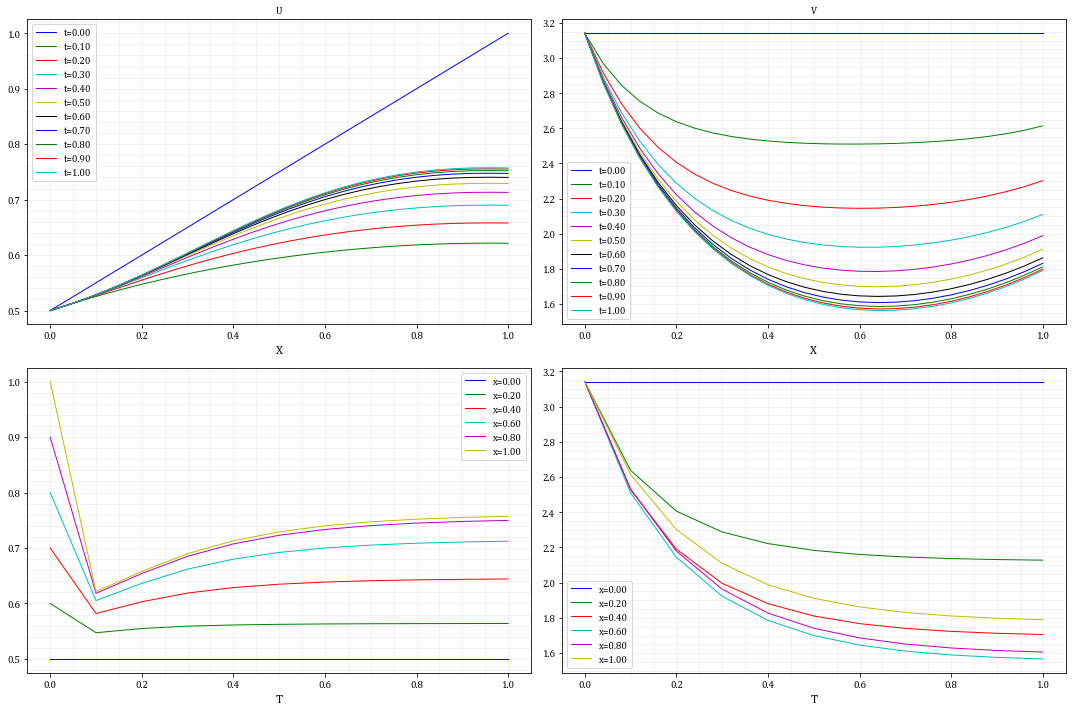

In [2]:
# Cleanup arrays - remove dummy boundaries
import matplotlib.pyplot as plt 
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots( 2, 2, figsize=(15,10) )
for n in np.arange(0,Nt) :
    ax1.plot( X, Uni[n,:], label=f"t={T[n]:.2f}" )
    ax2.plot( X, Vni[n,:], label=f"t={T[n]:.2f}" )

for i in np.arange(0,Ni,5) :
    ax3.plot( T, Uni[:,i], label=f"x={X[i]:.2f}" )
    ax4.plot( T, Vni[:,i], label=f"x={X[i]:.2f}" )
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

ax1.set_title("U")
ax2.set_title("V")
ax1.set_xlabel("X")
ax2.set_xlabel("X")
ax3.set_xlabel("T")
ax4.set_xlabel("T")
fig.tight_layout()

# CASE 2

In [2]:
from math import pi, sin, cos
import numpy as np
from numpy import linspace, zeros, arange
from numpy import ix_ as ix
np.set_printoptions(threshold=10000, linewidth=10000)
from numpy import exp, linspace, vectorize
import matplotlib.pyplot as plt
plt.style.use('paper.mplstyle')

# index i
Ni = 25
dx = 1/Ni
Ni += 1
# index N, t
Nt=10
dt = .1/Nt
Nt = Nt + 1

# Position and time arrays
X = linspace(0,1,Ni) 
T = linspace(0,.1,Nt)
# Solution vectors
Uni = zeros( [ Nt, Ni ] )
Vni = zeros( [ Nt, Ni ] )
# BC
Uni[:, 0] = 1/2
Vni[:, 0] = pi
free_dofs  = np.arange(2, 2*Ni)
# IC
Uni[0, :] = ( X + 1 ) / 2
Vni[0, :] = pi

#
#
#
def linear_solve( J1u, J2u, J1v, J2v, F1, F2 ) :
    global Ni, free_dofs
    Kff_ix = ix( free_dofs, free_dofs )
    Ff_ix = ix( free_dofs )

    # U and V indices inside the global linear system
    U_idx = arange(0,2*Ni,2)
    V_idx = arange(1,2*Ni,2)
    # Indices for the global linear system
    F1_idx = arange(0,2*Ni,2)
    F2_idx = arange(1,2*Ni,2)
    # Assemble global linear system
    K = zeros( [ 2*Ni, 2*Ni ] )
    F = zeros( 2*Ni )
    K[ix(F1_idx,U_idx)] = J1u
    K[ix(F2_idx,U_idx)] = J2u
    K[ix(F1_idx,V_idx)] = J1v
    K[ix(F2_idx,V_idx)] = J2v
    F[ix(F1_idx)] = F1
    F[ix(F2_idx)] = F2
    # Only free dofs - as we have forced the initial to the right value, the delta is zero (homogeneous)
    Kff = K[Kff_ix]
    Ff  = F[Ff_ix]   
    # Solve for the unknowns, update vectors
    df = np.linalg.solve( Kff, -Ff )
    # Collect solution 
    dUV = np.zeros_like(F);
    dUV[Ff_ix] = df
    dUk = dUV[ix(U_idx)]
    dVk = dUV[ix(V_idx)]
    
    err = np.linalg.norm(dUV)

    return dUk, dVk, err

#
# Solver
#
for n in arange(1,Nt) :
    print(f"Solving timestep {n} ...")

    # Solution from the previous TS
    Un = Uni[n-1,:]
    Vn = Vni[n-1,:]
    Uk = Un.copy()
    Vk = Vn.copy()

    # Newton loops
    k = 0
    err = 999
    while(1) :      
        # Jacobians and functions
        J1u = zeros([ Ni, Ni ] )
        J1v = zeros([ Ni, Ni ] )
        J2u = zeros([ Ni, Ni ] )
        J2v = zeros([ Ni, Ni ] )
        F1 = zeros(Ni) 
        F2 = zeros(Ni) 
        
        # Jacobians and residuals F
        for i in arange(1,Ni-1) :
            # Shortcuts
            h2 = dx*dx ; h=dx
            u = Uk[i]; v = Vk[i]
            u0 = Uk[i-1]; u1 = Uk[i+1] ; v0 = Vk[i-1]; v1 = Vk[i+1]
            du = u - u0   ; dv = v-v0 ; d2u = u1-2*u+u0 ; d2v = v1-2*v+v0
            v2 = v**2 ; u2=u**2

            F1[i] += (Un[i]-u) / dt
            F1[i] += v2 / h2 * d2u
            F1[i] += 2*v/h2 * dv * du
            F1[i] += -u*v + u2 + 10
    
            J1u[i,i]   += -2*v2/h2 + 2*v*dv/h2 - v + 2*u - 1/dt
            J1u[i,i-1] += v2/h2    - 2*v*dv/h2
            J1u[i,i+1] += v2/h2
    
            J1v[i,i]   += 2*v*d2u/h2 + 4*du*v/h2 - 2*v0/h2*du - u
            J1v[i,i-1] += -2*v/h2*du
            
            F2[i] += (Vn[i]-v)/dt
            F2[i] += u2/h2 * d2v
            F2[i] += 2*u*du*dv/h2
            F2[i] += d2u/h2
            F2[i] += u*v
            F2[i] += -v2
    
            J2u[i,i]   += 2*u*d2v/h2   +   4*u*dv/h2  -2*u0*dv/h2 -   2/h2  +  v
            J2u[i,i-1] += -2*u*dv/h2   +   1/h2
            J2u[i,i+1] += 1/h2
            
            J2v[i,i]   +=  -1/dt - 2*u2/h2   +   2*u*du/h2   +   u   +   -2*v
            J2v[i,i-1] +=  u2/h2   - 2*u*du/h2
            J2v[i,i+1] += u2/h2

        # Neumann BC @ x=1 (i=N)
        # u_x + sin(uv) = 1/2   @ x=1
        u = Uk[-1] ; v = Vk[-1] ; uv = u*v ;
        J1u[-1,-1] += 1/dx + v * cos(uv)
        J1u[-1,-2] += -1/dx
        J1v[-1,-1] += u * cos( uv )
        F1[-1] = ( u - Uk[-2] )/dx + sin(uv) - 1/2
        # v_x - cos(uv) = 1     @ x=1
        J2v[-1,-1] += 1/dx + u * sin( uv )
        J2v[-1,-2] += -1/dx
        J2u[-1,-1] += v * sin( uv )
        F2[-1] = ( v - Vk[-2] )/dx - cos(uv) - 1

        dUk, dVk, err = linear_solve( J1u, J2u, J1v, J2v, F1, F2 )
        Uk += dUk
        Vk += dVk

        # Finish newton loop?
        print(f"   Newton iteration #{k} ... (err={err:.3e})")
        if k > 50 : break   # max iterations ?
        if err < 1e-15 : break # min error ?
        # Continue
        k += 1

    # Left the newton loop, update solution
    Uni[n,:] = Uk
    Vni[n,:] = Vk

Solving timestep 1 ...
   Newton iteration #0 ... (err=1.373e+00)
   Newton iteration #1 ... (err=6.381e-01)
   Newton iteration #2 ... (err=4.523e-01)
   Newton iteration #3 ... (err=8.404e-01)
   Newton iteration #4 ... (err=1.357e+00)
   Newton iteration #5 ... (err=7.383e-01)
   Newton iteration #6 ... (err=2.838e-01)
   Newton iteration #7 ... (err=6.778e-02)
   Newton iteration #8 ... (err=6.868e-03)
   Newton iteration #9 ... (err=7.044e-05)
   Newton iteration #10 ... (err=7.381e-09)
   Newton iteration #11 ... (err=7.630e-16)
Solving timestep 2 ...
   Newton iteration #0 ... (err=1.075e+00)
   Newton iteration #1 ... (err=3.299e-01)
   Newton iteration #2 ... (err=5.594e-02)
   Newton iteration #3 ... (err=1.196e-03)
   Newton iteration #4 ... (err=8.344e-07)
   Newton iteration #5 ... (err=4.353e-13)
   Newton iteration #6 ... (err=7.156e-16)
Solving timestep 3 ...
   Newton iteration #0 ... (err=4.975e-01)
   Newton iteration #1 ... (err=3.844e-02)
   Newton iteration #2 ...

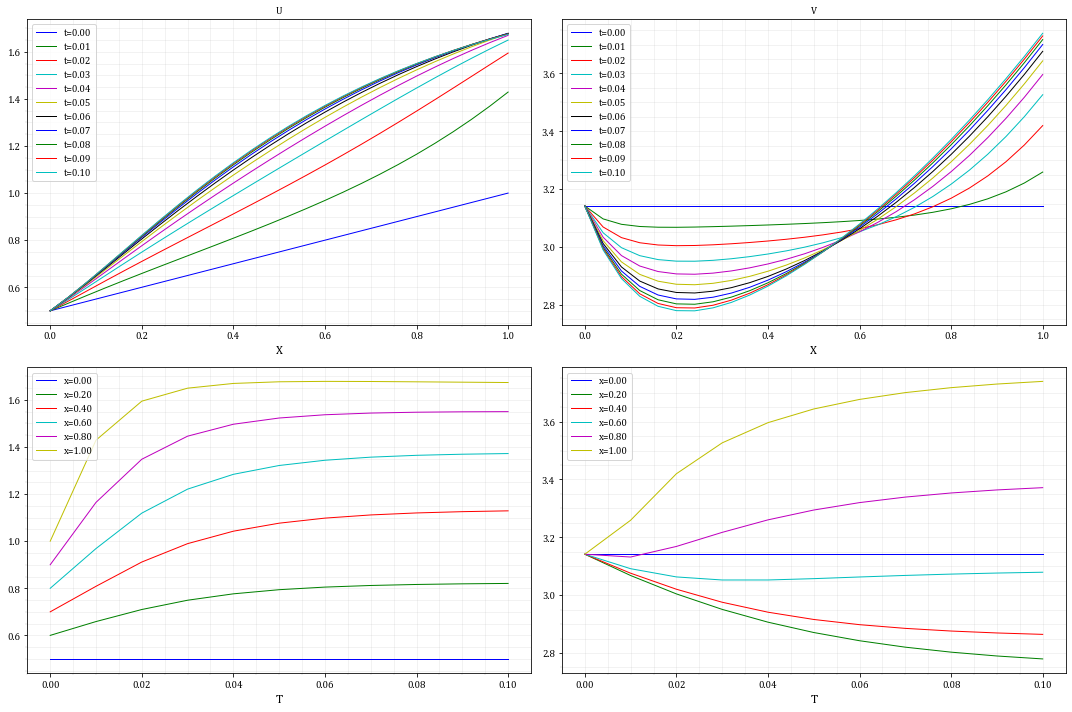

In [3]:
# Cleanup arrays - remove dummy boundaries
import matplotlib.pyplot as plt 
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots( 2, 2, figsize=(15,10) )
for n in np.arange(0,Nt) :
    ax1.plot( X, Uni[n,:], label=f"t={T[n]:.2f}" )
    ax2.plot( X, Vni[n,:], label=f"t={T[n]:.2f}" )

for i in np.arange(0,Ni,5) :
    ax3.plot( T, Uni[:,i], label=f"x={X[i]:.2f}" )
    ax4.plot( T, Vni[:,i], label=f"x={X[i]:.2f}" )
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

ax1.set_title("U")
ax2.set_title("V")
ax1.set_xlabel("X")
ax2.set_xlabel("X")
ax3.set_xlabel("T")
ax4.set_xlabel("T")
fig.tight_layout()

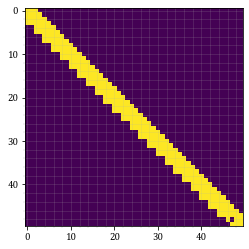

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

plt.imshow(Kff!=0, interpolation='none')